Вариант 7

6.1.7, 6.2.3 , 6.7.2, 6.6.7, 6.9.7

In [1]:
import numpy as np
from scipy import optimize
import math
from matplotlib import pyplot as plt
%matplotlib inline

#### 6.1.7

$$P_5(x) = 6.8 + 1.7x - 4.1x^2+0.1x^3-6.1x^4$$

$$\int\limits_{1}^{1.44}P_5(x)dx $$

In [2]:
c = np.array([6.8, 1.7, -4.1, 0.1, -6.1], dtype=float)
a = 1
b = 1.44

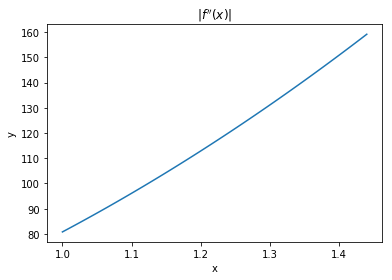

In [3]:
def poly(a, x):
    m_1 = len(a)
    return sum([a[i]*x**i for i in range(m_1)])

def p_5(arg):
    return poly(c, arg)
def dp_5(arg):
    m_1 = len(c)
    c1 = [c[i]*i for i in range(1, m_1)]
    return poly(c1, arg)
def d2p_5(arg):
    return -8.2 + 0.6*arg - 6.1*4*3*arg**2

x = np.linspace(a, b, 50)
y = abs(d2p_5(x))

plt.title("$|f''(x)|$")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)

In [4]:
M2 = abs(d2p_5(1.44))
M4 = 146.4
M2, M4

(159.12351999999998, 146.4)

#### 1

Вычислим интеграл аналитически:

In [5]:
c1 = [0] + [c[i]/(i+1) for i in range(len(c))]  ##коэффициенты в полиноме после интегрирования
I_analit = poly(c1, b) - poly(c1, a)      ##формула Ньютона-Лейбница
I_global = I_analit
print("Аналитическое значение интеграла: {}".format(I_analit))

Аналитическое значение интеграла: -5.061041144661332


#### 2

In [6]:
def trapec(func, a, b, N=1):
    h = (b-a)/N
    
    return (func(a) + func(b))*h/2 + h*sum([func(a + i*h) for i in range(1, N)])

def simp(func, a, b, N=1):
    h = (b-a)/N
    I = func(a) + func(b)
    I += 4*sum([func((2*a+i*h+(i-1)*h)/2) for i in range(1, N+1)])
    I += 2*sum([func(a+i*h) for i in range(1, N)])
    return I*h/6

In [7]:
I_tr = trapec(p_5, a, b, 1)
I_tr

-5.8924899123199985

In [8]:
I_sp = simp(p_5, a, b, 1)
I_sp

-5.061879468799998

#### 3

In [9]:
print("Погрешность формулы трапеций: {}\nПогрешность формулы Симпсона: {}"\
      .format(abs(I_tr - I_analit), abs(I_sp - I_analit)))

Погрешность формулы трапеций: 0.8314487676586664
Погрешность формулы Симпсона: 0.0008383241386660245


#### 4

$\epsilon = 0.0001$

Оценка шага для формулы трапеций:

$ h \le \sqrt{\frac{12\epsilon}{M_2(b-a)}} \\
M_2 = \max_{x\in[a, b]}{|f''(x)|}$

Оценка шага для формулы Симпсона:

$h \le \sqrt[4]{\frac{2880\epsilon}{M_4(b-a)}} \\
M_4 = \max_{x\in[a, b]}{|f^{IV}(x)|} $

In [10]:
eps = 0.0001

h2 = np.sqrt(12*eps/(M2*(b-a)))
h4 = (2880*eps/(M4*(b-a)))**(1/4)

h2, h4

(0.004139969066452174, 0.25858282967706686)

Выразим количество шагов, необходимое для достидения заданной точности через размер шага:

In [11]:
N2 = math.ceil((b-a)/h2)
N4 = math.ceil((b-a)/h4)
N2, N4

(107, 2)

#### 5

In [12]:
I_tr_1 = trapec(p_5, a, b, N2)
I_tr_1

-5.061114059481082

In [13]:
I_sp_1 = simp(p_5, a, b, N4)
I_sp_1

-5.061093539919999

#### 6

In [14]:
print("Погрешность формулы трапеций: {}\nПогрешность формулы Симпсона: {}"\
      .format(abs(I_tr_1 - I_analit), abs(I_sp_1 - I_analit)))

Погрешность формулы трапеций: 7.291481975002512e-05
Погрешность формулы Симпсона: 5.2395258666848576e-05


#### 6.2.3

$$P_6(x) = 0.1-0.1x+x^2+x^3+x^4+x^5$$

$$\int\limits_{1}^{1.44}P_6(x)dx $$

Используется формула трапеций

In [15]:
c = np.array([0.1, -0.1, 1, 1, 1, 1], dtype=float)
a = 0
b = 1

def pn(arg):
    return poly(c, arg)

I_analit = 1
print("Аналитическое значение интеграла: {}".format(I_analit))

Аналитическое значение интеграла: 1


In [16]:
In = trapec(pn, a, b, N=2)
In

1.2843749999999998

Оценим погрешность по правилу Рунге:

$\delta_{2n} = \theta|I_n - I_{2n}|$

Для формулы трапеций $\theta = \frac{1}{3}$

In [17]:
In_1 = trapec(pn, a, b, N=1)

rung = abs(In - In_1)/3

print("Погрешность по правилу Рунге: {}".format(rung))

Погрешность по правилу Рунге: 0.2552083333333333


In [18]:
print("Реальная абсолютная погрешность: {}".format(abs(I_analit - In)))

Реальная абсолютная погрешность: 0.2843749999999998


Формула трапеций дает точный результат только для многочленов первой степени, поскольку эта формула предполагает аппроксимацию прямыми отрезками

#### 6.7.2

Кривая 1:

$ y^2=4x $

Кривая 2:

$x^2=4y $

Используется квадратурная формула Симпсона 

In [19]:
y1 = np.linspace(-4.5, 4.5, 100)
x1 = (y1**2)/4

x2 = np.linspace(-4.5, 4.5, 100)
y2 = (x2**2)/4

In [20]:
x_fill = np.linspace(0, 4, 50)

y_fill_1 = np.sqrt(4*x_fill)
y_fill_2 = (x_fill**2)/4

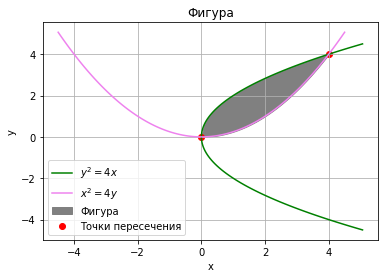

In [21]:
plt.plot(x1, y1, c='g')
plt.plot(x2, y2, c='violet')
plt.grid()

plt.fill_between(x_fill, y_fill_1, y_fill_2, color='grey')
plt.scatter((0, 4), (0, 4), c='r')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(("$ y^2=4x $", "$x^2=4y $", "Фигура", "Точки пересечения"))

plt.title("Фигура")

plt.show()

Точки пересечения:

$ (x1, y1) = (0, 0) \\
(x2, y2) = (4, 4) $

In [22]:
a = 0
b = 4

Найдем необходимое число шагов для достижения точности $\epsilon = 10^{-8}$ по правилу Рунге:

In [23]:
eps = 10**-8
delta = eps + 1
N = 46090
while delta > eps:
    N+=1
    I2n = simp(lambda x: np.sqrt(4*x), a, b, 2*N) - simp(lambda x: (x**2)/4, a, b, 2*N) 
    In = simp(lambda x: np.sqrt(4*x), a, b, N) - simp(lambda x: (x**2)/4, a, b, N) 
    delta = abs(I2n - In)/3
    
    print(delta)

1.0000847261437684e-08
1.0000503832448734e-08
1.0000173726136078e-08
9.999887436625462e-09


In [24]:
N = 2*N
I = simp(lambda x: np.sqrt(4*x), a, b, 2*N) - simp(lambda x: (x**2)/4, a, b, 2*N) 
print("Площадь фигуры: {}".format(I))

Площадь фигуры: 5.333333327532558


#### 6.6.7

Вычислим значение интеграла из задачи 6.1.7, используя формулу Гаусса

In [25]:
c = np.array([6.8, 1.7, -4.1, 0.1, -6.1], dtype=float)
a = 1
b = 1.44

def p_5(arg):
    return poly(c, arg)

def gauss(func, N, W, t, a, b):
    return ((b-a)/2)*sum([W[i]*func((a+b)/2 + ((b-a)/2)*t[i]) for i in range(N)])

In [26]:
Ns = [1, 2, 3, 4]
Is = []

In [27]:
N = 1
t = [0]
A = [2]

I = gauss(p_5, N, A, t, a, b)
Is.append(abs(I_global - I))
print("Интеграл по формуле Гаусса с одним узлом: {}".format(I))
print("Абсолютная погрешность: {}".format(abs(I_global - I)))

Интеграл по формуле Гаусса с одним узлом: -4.646574247039998
Абсолютная погрешность: 0.4144668976213337


In [28]:
N = 2
t = [-0.577350269189626, 0.577350269189626]
A = [1, 1]
I = gauss(p_5, N, A, t, a, b)
Is.append(abs(I_global - I))

print("Интеграл по формуле Гаусса с двумя узлами: {}".format(I))
print("Абсолютная погрешность: {}".format(abs(I_global - I)))

Интеграл по формуле Гаусса с двумя узлами: -5.06048226190222
Абсолютная погрешность: 0.0005588827591118672


In [29]:
N = 3
t = [-0.77459666929954, 0, 0.77459666929954]
A = [0.55555555555556, 0.88888888888888, 0.55555555555556]
I = gauss(p_5, N, A, t, a, b)
Is.append(abs(I_global - I))

print("Интеграл по формуле Гаусса с тремя узлами: {}".format(I))
print("Абсолютная погрешность: {}".format(abs(I_global - I)))

Интеграл по формуле Гаусса с тремя узлами: -5.061041144723653
Абсолютная погрешность: 6.232081517509869e-11


In [30]:
N = 4
t = [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]
A = [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]
I = gauss(p_5, N, A, t, a, b)
Is.append(abs(I_global - I))

print("Интеграл по формуле Гаусса с четырьмя узлами: {}".format(I))
print("Абсолютная погрешность: {}".format(abs(I_global - I)))

Интеграл по формуле Гаусса с четырьмя узлами: -5.061041144661331
Абсолютная погрешность: 8.881784197001252e-16


Гистограмма зависимости абсолютной погрешности от числа узлов:

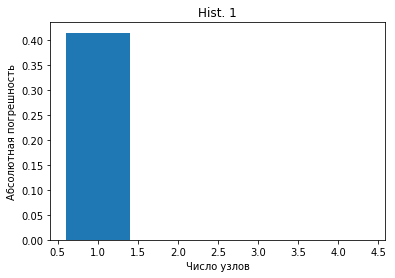

In [31]:
plt.bar(Ns, Is)

plt.xlabel("Число узлов")
plt.ylabel("Абсолютная погрешность")
plt.title("Hist. 1")

plt.show()

Для наглядности изменим масштаб по оси $y$ по формуле

$-\frac{1}{\log_{e}(x)}$

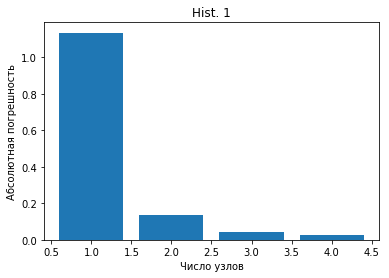

In [32]:
plt.bar(Ns, -1/np.log(Is))

plt.xlabel("Число узлов")
plt.ylabel("Абсолютная погрешность")
plt.title("Hist. 1")

plt.show()

#### 6.9.7

Решим интегральное уравнение:

$$y(x)-\lambda\int\limits_{a}^{b}k(x,t)y(t)dt = f(x) $$

$ k(x, t) = \frac{1}{5+\sin(x+t)} $

$f(x) = cos(x)$

$\lambda = 0.1$

$a=0$

$b=\pi$

используя квадратурная формула Гаусса с тремя узлами

In [33]:
def k(x, y):
    return 1/(5+np.sin(x+y))
def f(x):
    return np.cos(x)

lmb = 0.1
a = 0
b = np.pi

N = 3
t = [-0.77459666929954, 0, 0.77459666929954]
A = [0.55555555555556, 0.88888888888888, 0.55555555555556]


fi = [f(t[i]) for i in range(N)]
W = np.zeros(shape=(3,3))
z = [(a+b)/2 + ((b-a)/2)*t[i] for i in range(N)]

gamma = lmb*(b-a)/2

for i in range(3):
    for j in range(3):
        if i == j:
            W[i, i] = 1 - gamma*A[i]*k(z[i], z[i])
        else:
            W[i, j] = -gamma*A[j]*k(z[i], z[j])
        
y0 = np.linalg.solve(W, fi)
y0

array([0.76499959, 1.05753291, 0.78005651])

In [34]:
def res_func(arg, y0, A, z, f, k):
    return f(arg) + sum([A[j]*k(arg, z[j])*y0[j] for j in range(len(y0))])

In [35]:
h = (b-a)/10

hx = [a + q*h for q in range(10+1)]
hy = [res_func(arg, y0, A, z, f, k) for arg in hx]
print("Таблица значений:")
print("x\ty")
for i in range(11):
    print("{}\t{}".format(round(hx[i], 2), round(hy[i], 2)))

Таблица значений:
x	y
0.0	1.32
0.31	1.27
0.63	1.14
0.94	0.92
1.26	0.66
1.57	0.37
1.88	0.07
2.2	-0.19
2.51	-0.4
2.83	-0.53
3.14	-0.58


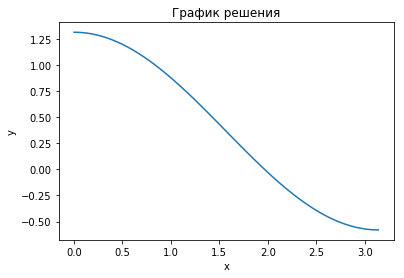

In [36]:
rx = np.linspace(a, b, 100)
ry = [res_func(arg, y0, A, z, f, k) for arg in rx]

plt.plot(rx, ry)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График решения')
plt.show()